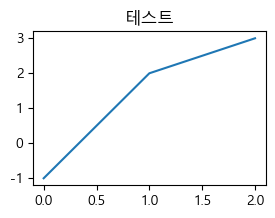

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass


### 데이터프레임 생성

In [2]:
# ----------------------------
# 기상데이터 전체
#   df_all
# ---------------------------- 
file_path = 'data/기상데이터/기상데이터_전체.csv'
df_all = pd.read_csv(file_path)
df_all.head(5)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),연도,월
0,108,서울,1907-10-01,13.5,7.9,20.7,NaN,NaN,1907,10
1,108,서울,1907-10-02,16.2,7.9,22.0,NaN,0.2,1907,10
2,108,서울,1907-10-03,16.2,13.1,21.3,NaN,2.4,1907,10
3,108,서울,1907-10-04,16.5,11.2,22.0,NaN,NaN,1907,10
4,108,서울,1907-10-05,17.6,10.9,25.4,NaN,NaN,1907,10


In [3]:
# ----------------------------
# 지점정보
#   df_location
# ---------------------------- 
file_path = 'data/기상데이터/기상데이터_지점정보.csv'
df_location = pd.read_csv(file_path)
df_location.tail(5)

,지점,지점명,데이터수,시작년도,끝년도
100,116,관악산,2738,1983,1990
101,239,세종,2130,2019,2025
102,296,북부산,811,2023,2025
103,181,서청주,701,2023,2025
104,176,대구(기),619,2013,2015


### 지점 입력받기


In [46]:
# --------------------
# 지점 입력받기
#   location_name
# --------------------
location_name = input('')


# --------------------
# 입력받은 지점의 정보 확인
# --------------------
cond = df_location['지점명'] == location_name
df_location.loc[cond]

,지점,지점명,데이터수,시작년도,끝년도
4,108,서울,41936,1907,2025


In [47]:
df_all

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),연도,월
0,108,서울,1907-10-01,13.5,7.9,20.7,NaN,NaN,1907,10
1,108,서울,1907-10-02,16.2,7.9,22.0,NaN,0.2,1907,10
2,108,서울,1907-10-03,16.2,13.1,21.3,NaN,2.4,1907,10
3,108,서울,1907-10-04,16.5,11.2,22.0,NaN,NaN,1907,10
4,108,서울,1907-10-05,17.6,10.9,25.4,NaN,NaN,1907,10
...,...,...,...,...,...,...,...,...,...,...
1756507,296,북부산,2025-03-27,16.9,14.8,19.2,NaN,0.5,2025,3
1756508,296,북부산,2025-03-28,12.1,8.0,16.5,NaN,0.5,2025,3
1756509,296,북부산,2025-03-29,7.7,1.6,12.7,NaN,NaN,2025,3
1756510,296,북부산,2025-03-30,5.3,1.4,11.0,NaN,NaN,2025,3


### 연도별 폭염 일수

In [48]:
# ---------------------------------------
# 입력한 지점의 폭염 데이터 선택
# 폭염의 기준 : 최고기온 33도 이상
#   df_hotday
# ---------------------------------------

cond1 = df_all['지점명'] == location_name
cond2 = df_all['최고기온(°C)'] >= 33
df_hotday = df_all.loc[cond1&cond2, ['지점명','연도', '일시','최고기온(°C)']]
df_hotday


,지점명,연도,일시,최고기온(°C)
310,서울,1908,1908-08-06,33.6
322,서울,1908,1908-08-18,33.3
324,서울,1908,1908-08-20,33.5
673,서울,1909,1909-08-04,33.2
674,서울,1909,1909-08-05,34.5
...,...,...,...,...
1595767,서울,2024,2024-09-09,34.1
1595768,서울,2024,2024-09-10,33.9
1595769,서울,2024,2024-09-11,34.6
1595775,서울,2024,2024-09-17,33.2


In [49]:
# ---------------------------------------
# 연도별 폭염일수 요약
#   df_hotday_year
# ---------------------------------------

df_hotday_year = df_hotday.groupby('연도').size().to_frame()
df_hotday_year.columns = ['폭염일수']
df_hotday_year

,폭염일수
연도,
1908,3
1909,5
1910,1
1911,5
1912,3
...,...
2020,4
2021,18
2022,10


In [50]:
# 1963년 이후만 필터링
df_filtered = df_hotday_year[df_hotday_year.index >= 1963]
# 63년 이후 폭염일수 합계
total_hot_days = df_filtered['폭염일수'].sum()

print(total_hot_days)


500


In [51]:
df_hotday_year

,폭염일수
연도,
1908,3
1909,5
1910,1
1911,5
1912,3
...,...
2020,4
2021,18
2022,10


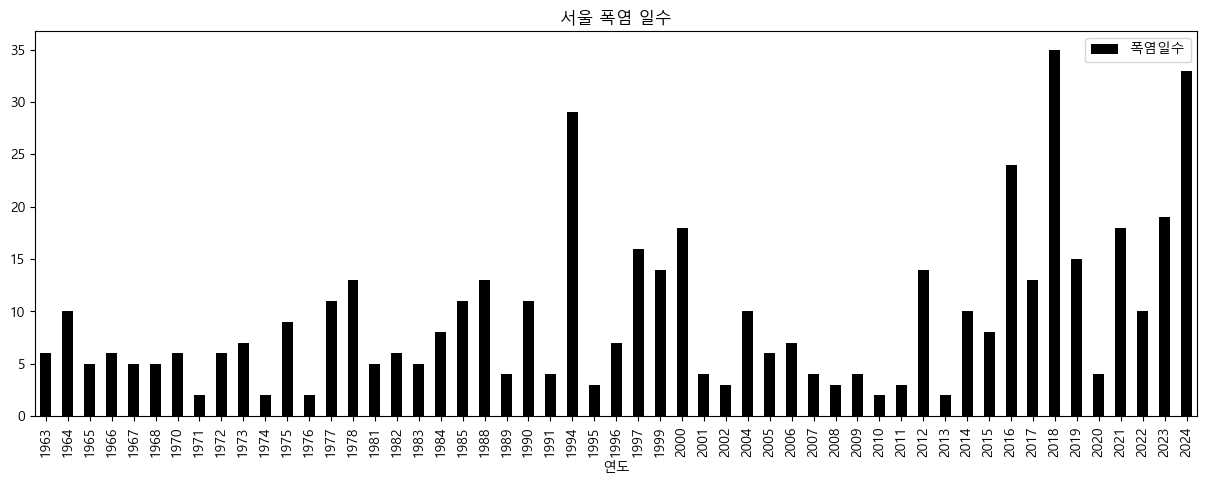

In [52]:
# ---------------------------------------
# 연도별 폭염일수 시각화
# ---------------------------------------

df_hotday_year[df_hotday_year.index >= 1963].plot.bar(figsize=(15,5),
                        title = f'{location_name} 폭염 일수',
                        color='black');

In [53]:
df_all.head(5)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),연도,월
0,108,서울,1907-10-01,13.5,7.9,20.7,NaN,NaN,1907,10
1,108,서울,1907-10-02,16.2,7.9,22.0,NaN,0.2,1907,10
2,108,서울,1907-10-03,16.2,13.1,21.3,NaN,2.4,1907,10
3,108,서울,1907-10-04,16.5,11.2,22.0,NaN,NaN,1907,10
4,108,서울,1907-10-05,17.6,10.9,25.4,NaN,NaN,1907,10


### 연도별 열대야 일수

In [54]:
# ---------------------------------------
# 입력한 지점의 열대야 데이터 선택
# 열대야 기준 : 최저기온 25도 이상
#   df_hotnight
# ---------------------------------------
cond1 = df_all['지점명'] == location_name
cond2 = df_all['최저기온(°C)'] >= 25
df_hotnight = df_all.loc[cond1&cond2,['지점명','연도','일시','최저기온(°C)']]
df_hotnight


,지점명,연도,일시,최저기온(°C)
677,서울,1909,1909-08-08,25.3
678,서울,1909,1909-08-09,25.6
10357,서울,1910,1910-07-29,25.0
10359,서울,1910,1910-07-31,25.2
10736,서울,1911,1911-08-12,25.8
...,...,...,...,...
1595769,서울,2024,2024-09-11,25.4
1595772,서울,2024,2024-09-14,25.2
1595775,서울,2024,2024-09-17,25.8
1595776,서울,2024,2024-09-18,26.5


In [55]:
# ---------------------------------------
# 연도별 열대야일수 요약
#   df_hotnight_year
# ---------------------------------------

df_hotnight_year = df_hotnight.groupby('연도').size().to_frame()
df_hotnight_year.columns = ['열대야일수']
df_hotnight_year

,열대야일수
연도,
1909,2
1910,2
1911,1
1914,4
1915,3
...,...
2020,14
2021,20
2022,20


In [56]:
# 1963년 이후만 필터링
df_filtered = df_hotnight_year[df_hotnight_year.index >= 1963]
# 63년 이후 열대야일수 합계
total_hot_nights = df_filtered['열대야일수'].sum()

print(total_hot_nights)


551


In [57]:
df_hotnight_year

,열대야일수
연도,
1909,2
1910,2
1911,1
1914,4
1915,3
...,...
2020,14
2021,20
2022,20


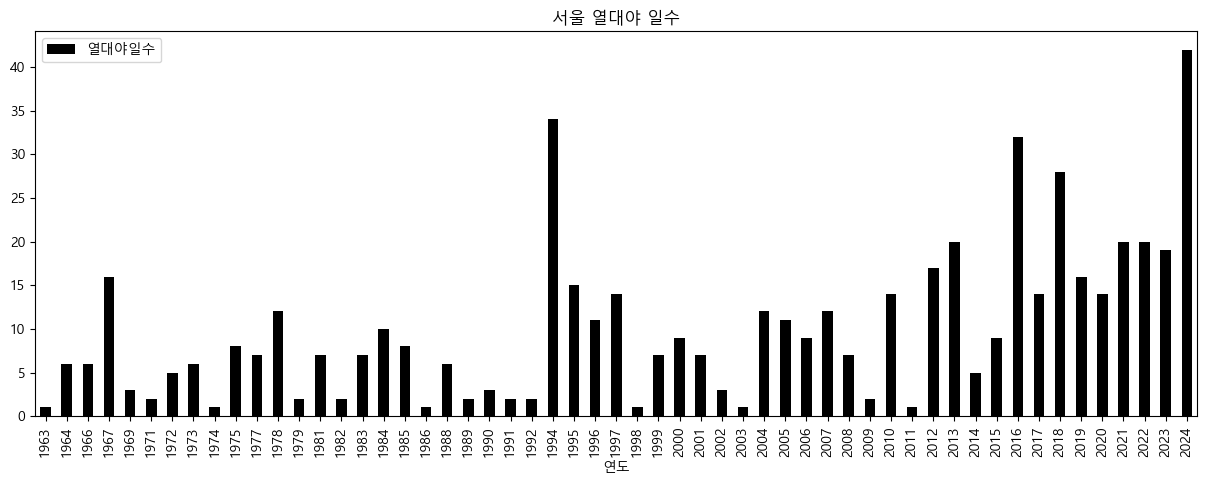

In [58]:
# ---------------------------------------
# 연도별 열대야 일수 시각화
# ---------------------------------------
df_hotnight_year[df_hotnight_year.index >= 1963].plot.bar(figsize=(15,5),
                        title = f'{location_name} 열대야 일수',
                        color='black');

In [59]:
df_hotday

,지점명,연도,일시,최고기온(°C)
310,서울,1908,1908-08-06,33.6
322,서울,1908,1908-08-18,33.3
324,서울,1908,1908-08-20,33.5
673,서울,1909,1909-08-04,33.2
674,서울,1909,1909-08-05,34.5
...,...,...,...,...
1595767,서울,2024,2024-09-09,34.1
1595768,서울,2024,2024-09-10,33.9
1595769,서울,2024,2024-09-11,34.6
1595775,서울,2024,2024-09-17,33.2


### 연도별 가장 이른/늦은 폭염 열대야

In [20]:
# ---------------------------------------
# 가장 이른/늦은 폭염
#   df_hotday_early_late
# ---------------------------------------
df_hotday_early_late = df_hotday.groupby('연도')['일시'].agg(가장이른폭염일 = 'min', 가장늦은폭염일 = 'max')
df_hotday_early_late

,가장이른폭염일,가장늦은폭염일
연도,,
1908,1908-08-06,1908-08-20
1909,1909-08-04,1909-08-10
1910,1910-07-30,1910-07-30
1911,1911-08-09,1911-08-17
1912,1912-08-05,1912-08-11
...,...,...
2020,2020-06-13,2020-08-26
2021,2021-07-14,2021-08-09
2022,2022-07-02,2022-07-30


In [21]:
# ---------------------------------------
# 가장 이른/늦은 열대야
#    df_hotnight_early_late
# ---------------------------------------
df_hotnight_early_late = df_hotnight.groupby('연도')['일시'].agg(가장이른열대야일 = 'min', 가장늦은열대야일 = 'max')
df_hotnight_early_late

,가장이른열대야일,가장늦은열대야일
연도,,
1909,1909-08-08,1909-08-09
1910,1910-07-29,1910-07-31
1911,1911-08-12,1911-08-12
1914,1914-07-26,1914-08-15
1915,1915-07-22,1915-07-29
...,...,...
2020,2020-08-04,2020-08-29
2021,2021-07-13,2021-08-06
2022,2022-06-27,2022-08-20


### 데이터프레임 통합
* 폭염일수, 열대야일수, 가장이른폭염일, 가장늦은폭염일, 가장이른열대야일, 가장늦은열대야일

In [22]:
# ---------------------------------------------------------------------------------------
# 폭염일수, 열대야일수, 가장이른폭염일, 가장늦은폭염일, 가장이른열대야일, 가장늦은열대야일
#   df_hotdaynight
# ---------------------------------------------------------------------------------------
df_list = [df_hotday_year, df_hotnight_year, df_hotday_early_late, df_hotnight_early_late]
df_hotdaynight = pd.concat(df_list, axis=1).sort_index()

df_hotdaynight.head(10)

,폭염일수,열대야일수,가장이른폭염일,가장늦은폭염일,가장이른열대야일,가장늦은열대야일
연도,,,,,,
1908,3.0,NaN,1908-08-06,1908-08-20,NaN,NaN
1909,5.0,2.0,1909-08-04,1909-08-10,1909-08-08,1909-08-09
1910,1.0,2.0,1910-07-30,1910-07-30,1910-07-29,1910-07-31
1911,5.0,1.0,1911-08-09,1911-08-17,1911-08-12,1911-08-12
1912,3.0,NaN,1912-08-05,1912-08-11,NaN,NaN
1914,11.0,4.0,1914-06-24,1914-08-22,1914-07-26,1914-08-15
1915,10.0,3.0,1915-07-26,1915-08-08,1915-07-22,1915-07-29
1916,2.0,NaN,1916-07-30,1916-08-27,NaN,NaN
1917,18.0,NaN,1917-06-15,1917-08-03,NaN,NaN


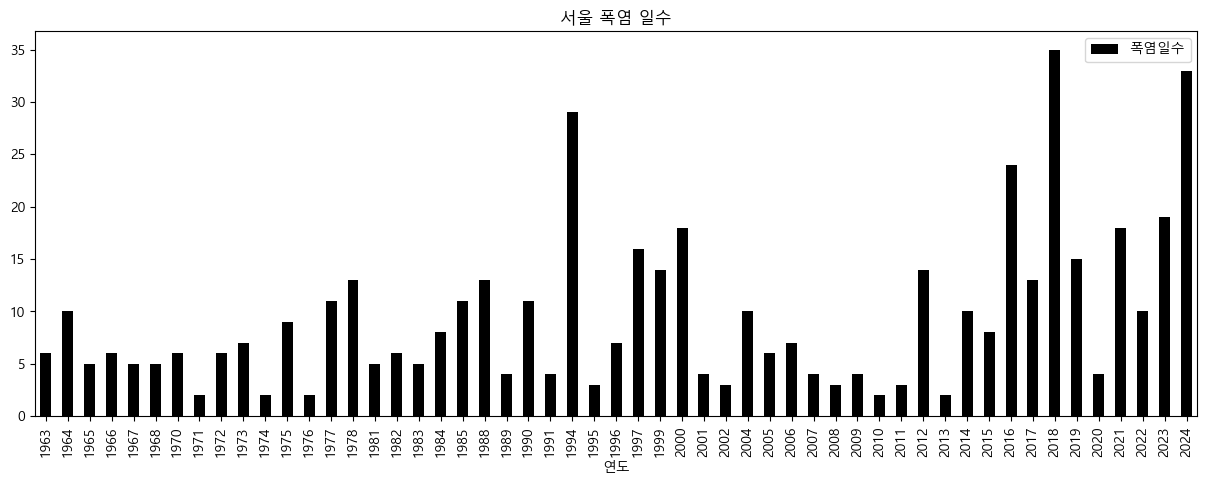

1963년 이후 서울 폭염 일수 : 500일

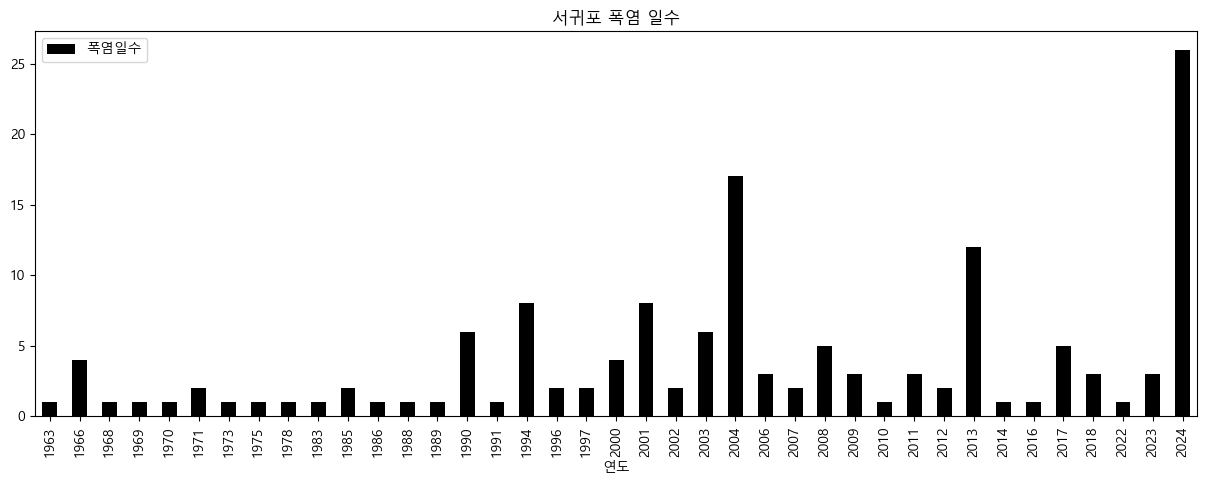

1963년 이후 서귀포 폭염 일수 : 146일

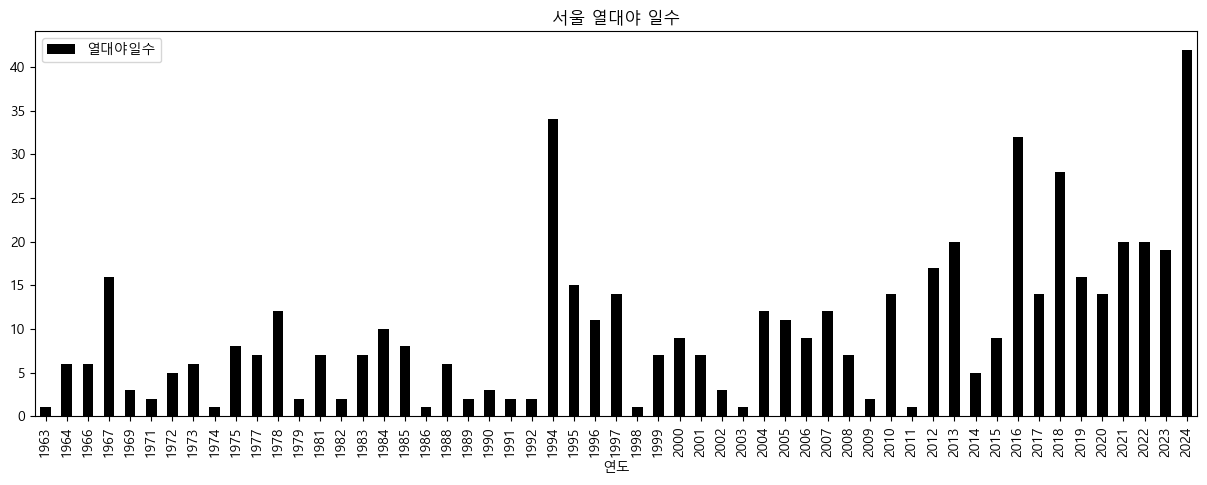
1963년 이후 서울 열대야 일수 : 551일

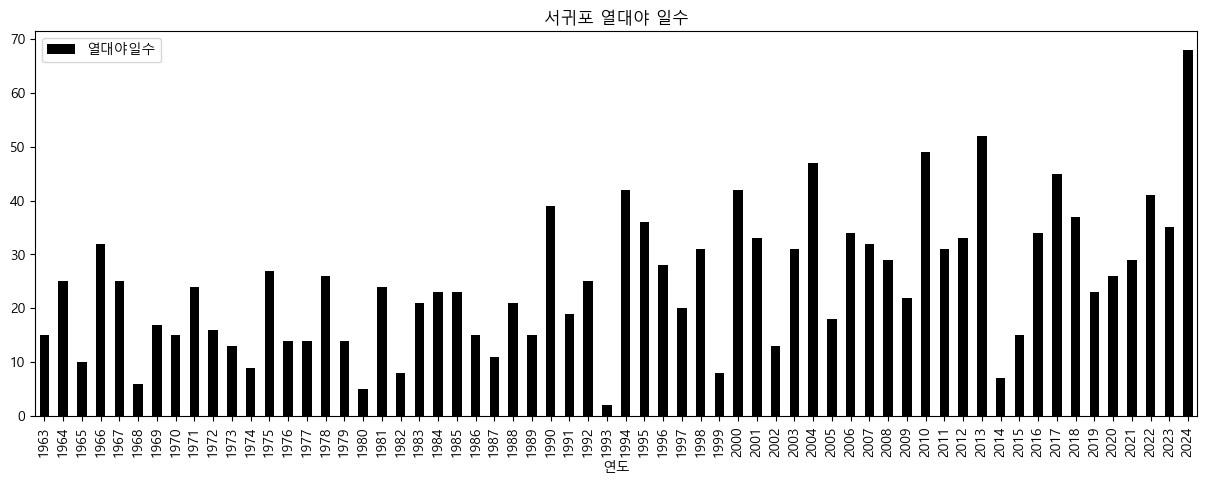

1963년 이후 서귀포 열대야 일수 : 1544일

## 폭염·열대야 차이 분석 보고서

### 0. 분석 배경
- **초기 선택**: 폭염의 심각성을 확인하기 위해, 주어진 지점명 중 **평균기온이 가장 낮은 대관령**을 선택.
- **문제 발생**: 33℃ 이상 조건을 적용했을 때, 결과가 아무것도 출력되지 않음.
  - 처음에는 코드 문제로 생각했으나, 실제로 대관령이 33℃를 넘는 경우는 극히 드물어(사실상 국가적 기후 재난 수준) 합리적인 결과임을 인지.
- **전략 변경**: 폭염일수 분석에 적합한 **가장 더운 지역**을 선택하기로 함.
- **최종 선택**: 가장 저위도에 위치한 **서귀포**를 분석 대상으로 설정.

***연도별로 폭염과 열대야 일수를 정리했지만, 시간의 흐름에 따른 폭염, 열대야 보다는 서울과 서귀포의 폭염 및 열대야 일수 차이에 훨씬 관심이 가게 되었음. 서귀포가 최남단 근처 저위도에 위치해 있음에도 불구하고 폭염일수가 서울보다 적다는 점을 발견하고 확인 및 분석을 진행함.*** 
---

### 1. 폭염·열대야 통계 비교
- **폭염일수(1963년 이후)**  
  - 서귀포: **146일**  
  - 서울: **500일**
- **관측 시작 시점**  
  - 서귀포: 첫 폭염 관측 1963년  
  - 서울: 첫 폭염 관측 1908년
- **열대야일수(1961년 이후)**  
  - 서귀포: **1582일**  
  - 서울: **562일**  
  - (서울은 1909년부터 계산해도 654일 수준)

📌 결론:  
- **폭염**: 1963년 이래로 서울(500일)이 서귀포(146일)보다 압도적으로 많음.  
- **열대야**: 1961년 이래로 서귀포(1582일)가 서울(562일)보다 압도적으로 많음.

---

### 2. 원인 분석

#### 2.1 해양성 기후 특성 (서귀포)
- 서귀포는 제주 남부 해안에 위치해 **해양성 기후**의 영향을 강하게 받음.
- 바다는 **비열이 크기** 때문에 여름 낮에도 기온이 급격히 오르지 않지만, 밤에는 서서히 식어 **최저기온이 높게 유지**됨.
- 결과적으로 **폭염일수는 적지만**, **열대야일수는 많음**.

#### 2.2 내륙성 기후 (서울)
- 서울은 내륙에 위치해 **일교차가 큼**.
- 여름 낮에 강한 복사열로 기온이 빠르게 올라 **폭염일수가 많음**.
- 밤에는 해양 완충 효과가 없어 기온이 비교적 빨리 떨어져 **열대야는 적음**.
- 최근 **도시화·열섬효과**로 열대야 증가 추세.

#### 2.3 기온 변동 패턴 비교
| 기후 유형   | 낮         | 밤         |
|-------------|------------|------------|
| 해양성 기후 | 덜 덥다    | 덜 시원하다 |
| 내륙성 기후 | 더 덥다    | 더 시원하다 |

---

### 📌 종합 정리
- **폭염**: 낮 최고기온이 높아야 발생 → **내륙성(서울)**이 유리(?)  
- **열대야**: 밤 최저기온이 높아야 발생 → **해양성(서귀포)**가 유리  
- 서귀포의 열대야가 압도적으로 많은 이유 → **바다의 완충 효과 + 고위도 대비 높은 평균기온**  
- 서울의 폭염이 많은 이유 → **내륙성 기후 + 도시 열섬 효과**
